# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import Kmeans 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Wholesale_Data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Checking for NULL/missing data values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


No null values in this dataset.

---

## Checking for duplicate rows in the data:

Same number of rows after running drop_duplicates() means we did not have any duplicates to begin with.

In [5]:
#Removing Duplicate Rows
df.drop_duplicates()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


There were no duplicate rows in this dataset.

---

## Finding out what the numbers in the columns represent in plain english:

The Channel and Region columns seem to categorical values, let's see how many unique categories there are in each.

In [6]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [7]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

### Meaning of the numbers in the 'region' and 'channel' columns

- There are 2 Channels and 3 regions in this wholesale dataset.
- Regions - Lisnon, Oporto or Other (Nominal) (1,2,3)
- Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal) (1,2)

### Meaning of the numbers in the item category columns:

- Annual spending (Mauritian Rupee) on the type of product the category represents.
- Mauritius is where this dataset comes from based on the currency used
- Mauritus is a country in East Africa

## Checking for outliers in the data:

In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- Based on the summary statistics above, the data seems to have fairly simmilar min and max values for all categories.
- 'Fresh' gets the most sales
- 'Detergents_Paper' gets the least sales
- This is not including channel and region columns as those do not represent sales number but instead categories.

In [9]:
#just the columns we want to visualize
continuous_columns = df.iloc[:,2:]

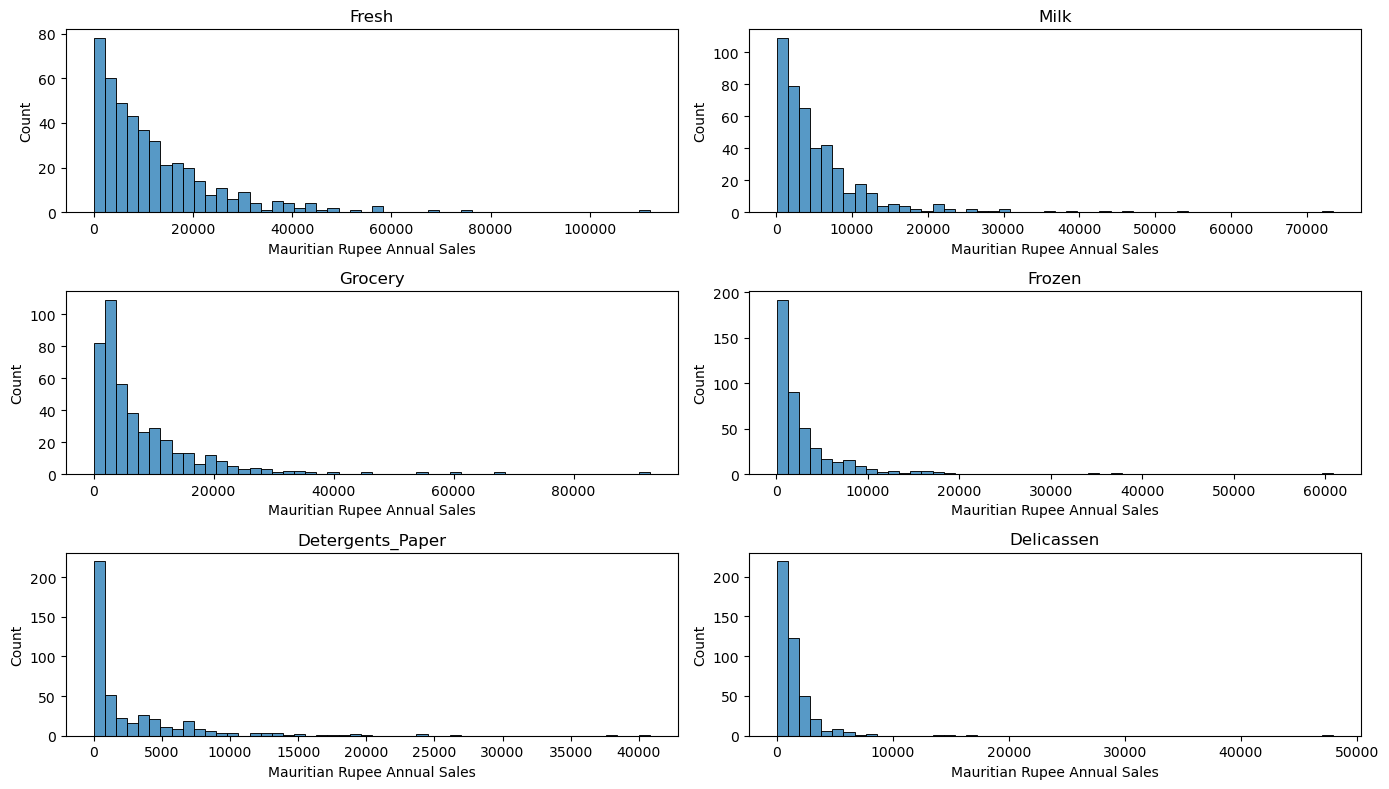

In [10]:
fig, axes = plt.subplots(nrows=int(len(continuous_columns.columns)/2), ncols=2, figsize=(14, 8))
axes = axes.flatten()  # Makes it easier to loop through each subplot, nya~

for i, column in enumerate(continuous_columns.columns):
    sns.histplot(continuous_columns[column], bins=50, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("Mauritian Rupee Annual Sales")  # Changing the x-axis title here, nya~

plt.tight_layout()
plt.show()

## Handling outliers

### note: we handle it using the robust scalar which can handle outliers much better than the standard scalar

In [11]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Create the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
continuous_columns_scaled_robust = pd.DataFrame(robust_scaler.fit_transform(continuous_columns), columns=continuous_columns.columns)

# Now let's add MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the robust-scaled data with MinMaxScaler
continuous_columns_scaled = pd.DataFrame(minmax_scaler.fit_transform(continuous_columns_scaled_robust), columns=continuous_columns.columns)

## Is the data unbiased:

- It seems multiple rows can contain the same combination of region and channel. 
- Are some of these combinations under or overrepresented in the data?
- This could lead to bias in our machine learning model, so we will investigate.

In [12]:
# sort the dataframe
# based on region and channel
df.sort_values(['Region', 'Channel'], ascending = [False, True])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,1,3,13265,1196,4221,6404,507,1788
8,1,3,5963,3648,6192,425,1716,750
15,1,3,10253,1114,3821,397,964,412
17,1,3,5876,6157,2933,839,370,4478
19,1,3,7780,2495,9464,669,2518,501
...,...,...,...,...,...,...,...,...
245,2,1,3062,6154,13916,230,8933,2784
251,2,1,6134,23133,33586,6746,18594,5121
264,2,1,1073,9679,15445,61,5980,1265
266,2,1,572,9763,22182,2221,4882,2563


In [13]:
Channel_1 = df[df['Channel'] == 1] #represents Hotel/Restaurant/Catering 'HoReCa'
regions_ch_1 = Channel_1['Region']
regions_ch_1.value_counts()

3    211
1     59
2     28
Name: Region, dtype: int64

- It seems that region 3 is overepresented in this channel (HoReCa) compared to the other two regions
- This makes sense because region 3 just represent any region that is not Lisnon or Oporto

In [14]:
Channel_2 = df[df['Channel'] == 2]
regions_ch_2 = Channel_2['Region']
regions_ch_2.value_counts()

3    105
2     19
1     18
Name: Region, dtype: int64

- Again with channel 2 (retail channel) region 3 (other) is represented much more than the other two regions

# Part II - KMeans Clustering

---

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [15]:
#The data we want to cluster
continuous_columns_scaled.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [16]:
continuous_columns_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## Determining how many clusters we should use: 

## The Below function will get distortion values for each number of clusters we run k-means with:

In [17]:
def plot_distortion(continous_columns_scaled,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(continous_columns_scaled)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

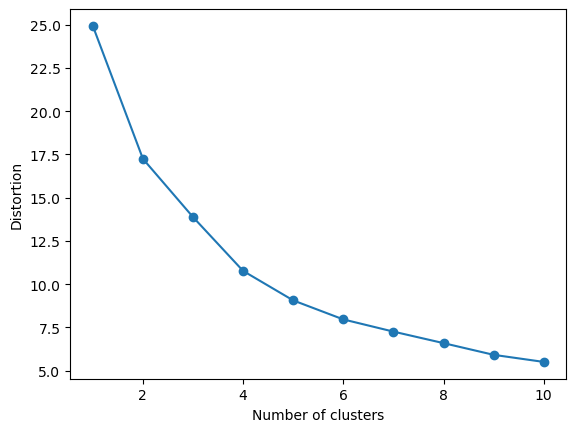

In [18]:
# elbow rule
#we are running this function for each value of k
plot_distortion(continuous_columns_scaled,max_clusters=10)

- We are using the elbow rule to determine which number of clusters gives the optimal number of clusters
- In this case it looks like the model gets diminishing returns after 4 clusters
- We will use 4 clusters in our final model

In [19]:
# Fit the model
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(continuous_columns_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
print(continuous_columns_scaled.columns)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


In [21]:
# Create a new DataFrame to hold the clusters
clusters_df = continuous_columns_scaled.copy()

#Add a new column for cluster labels
clusters_df['Cluster'] = y_km

clusters_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,1
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0
...,...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,0
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,0
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,3
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,1


In [22]:
# Group by the 'Cluster' column and take the mean
clusters_means = clusters_df.groupby('Cluster').mean()

clusters_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,0.332952,0.083262,0.068199,0.134631,0.023506,0.069033
1,0.082507,0.041405,0.041626,0.043299,0.024413,0.021570
2,0.142329,0.471842,0.523124,0.049793,0.609254,0.061322
3,0.051815,0.145674,0.183377,0.023605,0.180126,0.038898


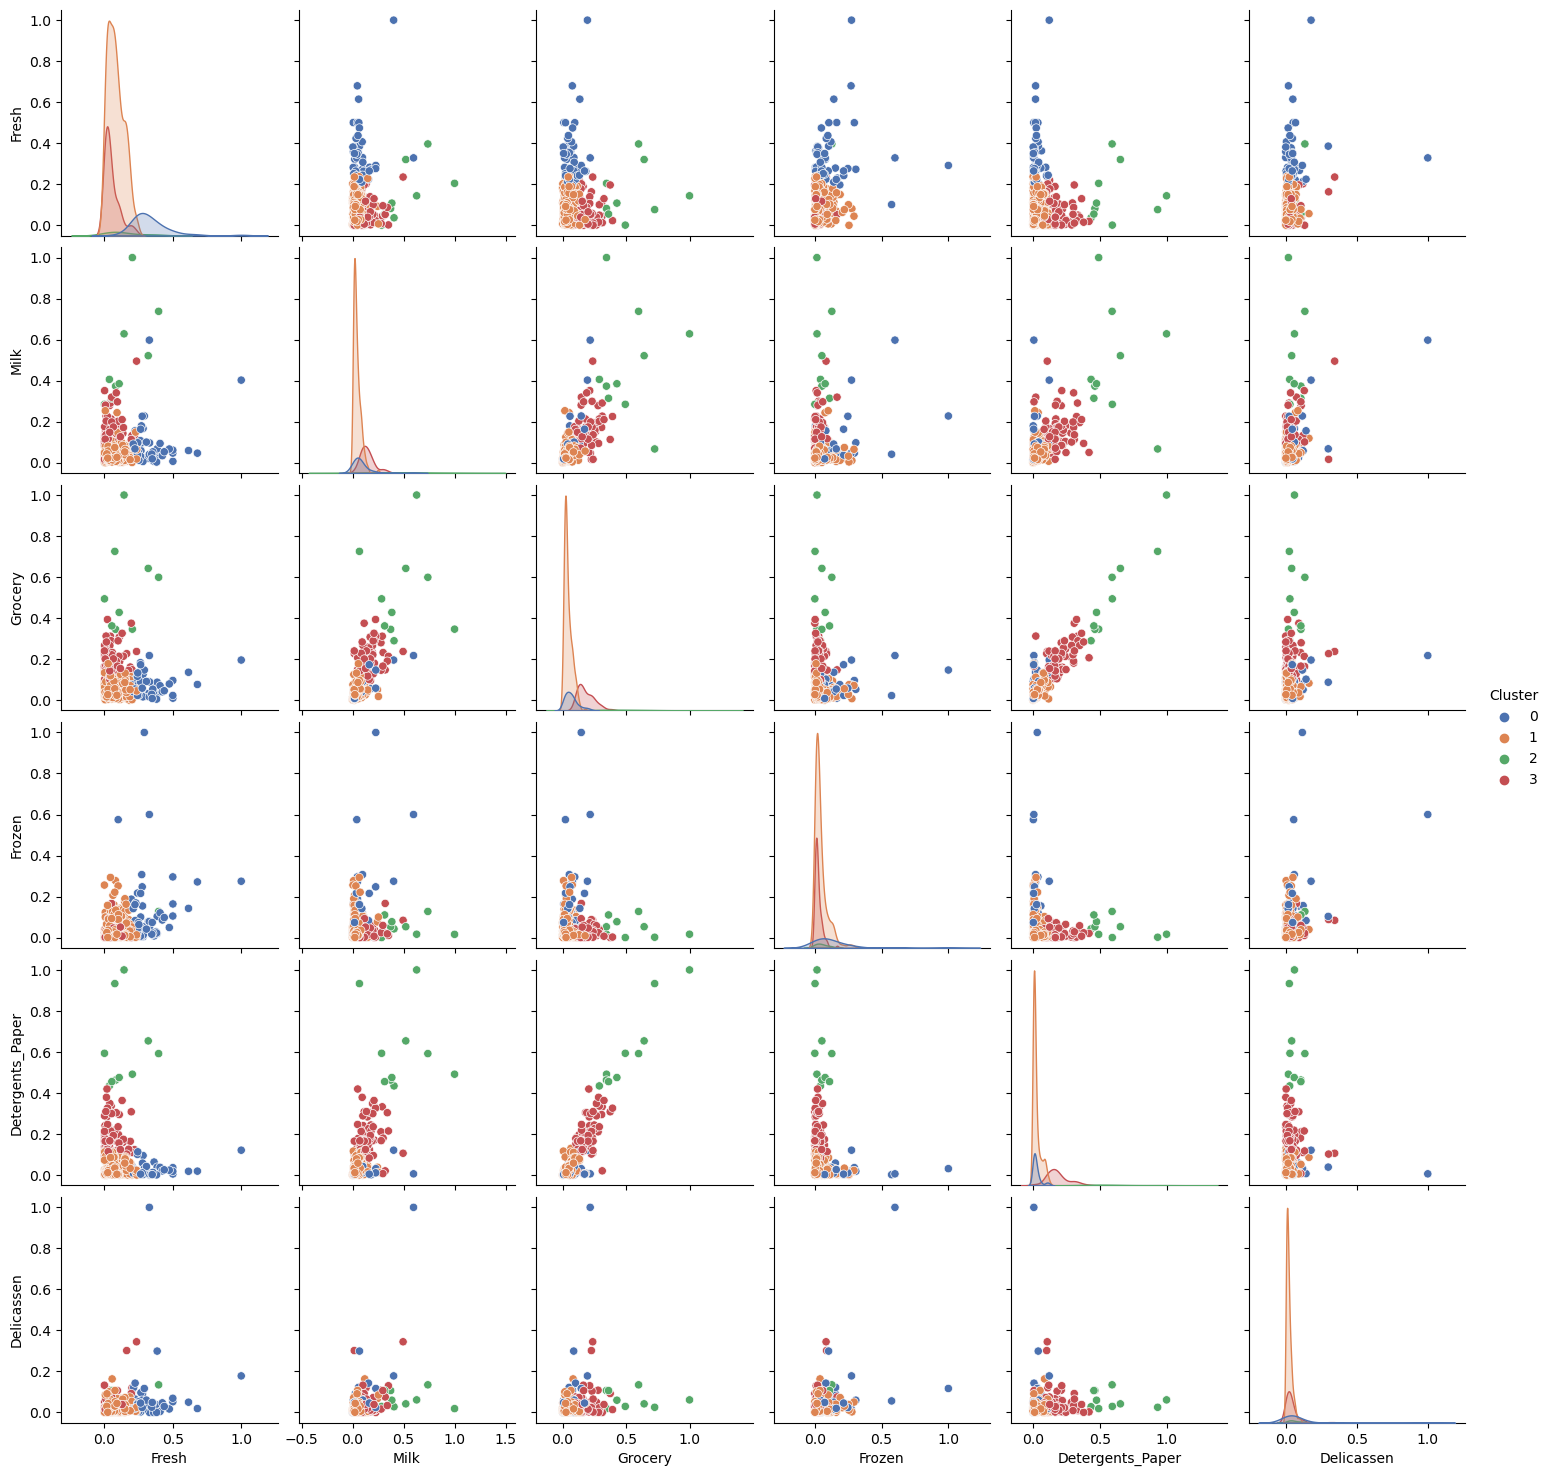

In [23]:
sns.pairplot(clusters_df, hue='Cluster', palette='deep')
plt.show()

In [24]:
#calculate the row-wise sum for each category
clusters_df['Total'] = clusters_df.iloc[:, :-1].sum(axis=1)  # Skipping the 'Cluster' column

#create a new DataFrame to hold the ratios
ratio_df = clusters_df.iloc[:, :-2].div(clusters_df['Total'], axis=0)  # Again, skipping 'Cluster' and 'Total'

# Add the 'Cluster' back into the ratio DataFrame
ratio_df['Cluster'] = clusters_df['Cluster']

# Finally, let's group by 'Cluster' and get the mean ratio for each category within each cluster!
cluster_ratio_means = ratio_df.groupby('Cluster').mean()

print(cluster_ratio_means)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Cluster                                                                      
0        0.522224  0.103994  0.095940  0.165384          0.033668    0.078790
1        0.325690  0.161969  0.168336  0.168765          0.089700    0.085542
2        0.068432  0.252596  0.279886  0.028815          0.335355    0.034916
3        0.078561  0.232574  0.298356  0.036366          0.295438    0.058705


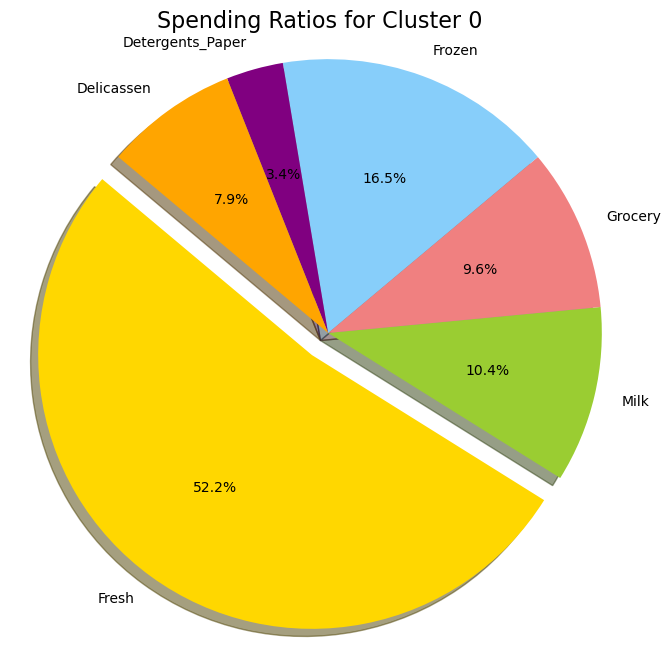

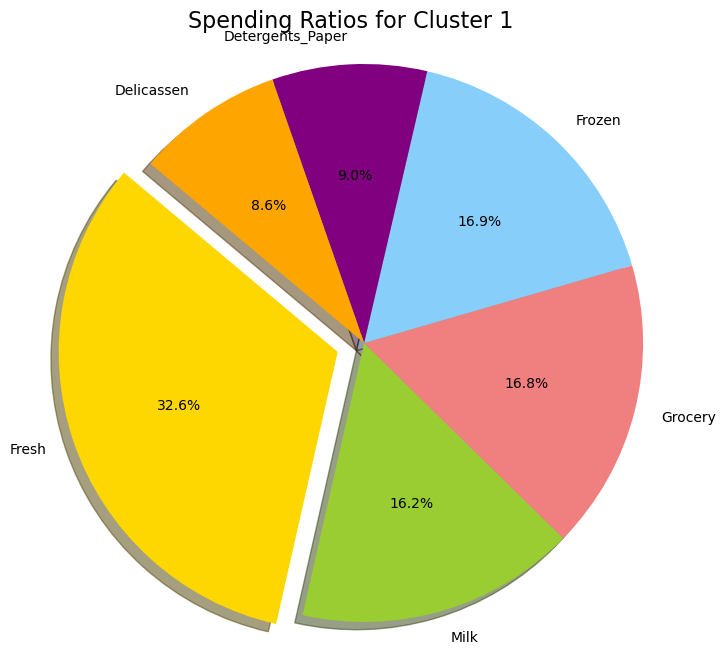

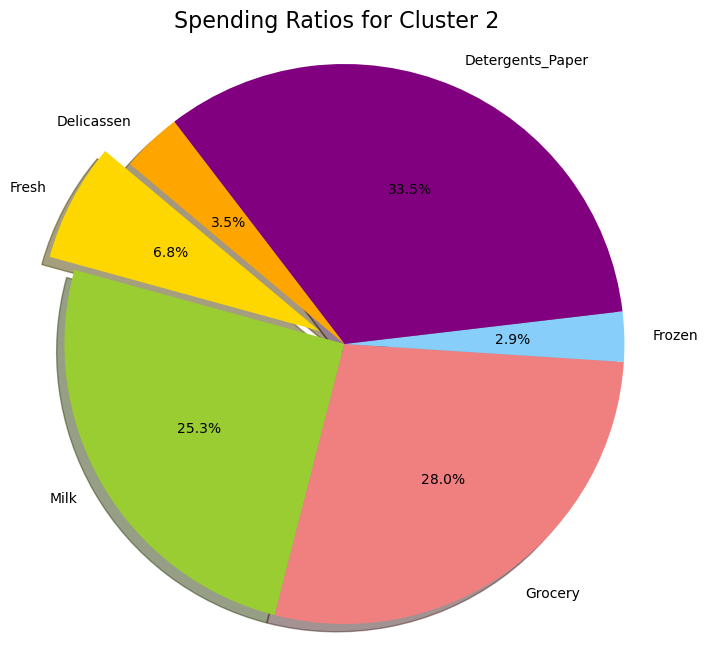

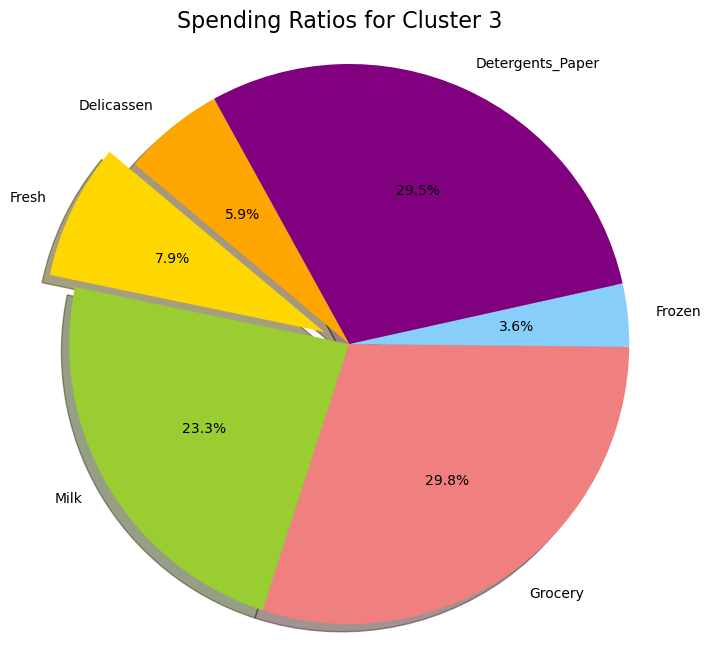

In [25]:
import matplotlib.pyplot as plt

# loop through each cluster and make a pie chart
for cluster, data in cluster_ratio_means.iterrows():
    # Data to plot
    labels = data.index
    sizes = data.values
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange']
    
    # Explode the 1st slice
    explode = (0.1, 0, 0, 0, 0, 0)  
    
    # Pie chart details
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.title(f'Spending Ratios for Cluster {cluster}', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    
    # Show plots
    plt.show()

## Each cluster represents a different type of customers spending habits. In this case we have 4 different types of customers:
---

| Cluster | Spending Level  | Shopping Style                                                                                      |
|---------|-----------------|-----------------------------------------------------------------------------------------------------|
| 0       | Medium            | Health-conscious or restaurant owners, balanced with a focus on fresh produce and frozen goods.      |
| 1       | Low             | Possibly prefers processed foods, could be eating out often, low on cleaning supplies.                |
| 2       | High        | Convenience or fast-food oriented, good amount of dairy and high on cleaning supplies.                |
| 3       | Medium            | Convenience store types, moderate spending on groceries and cleaning supplies.                        |

## Which customers (clusters) spend the most money:

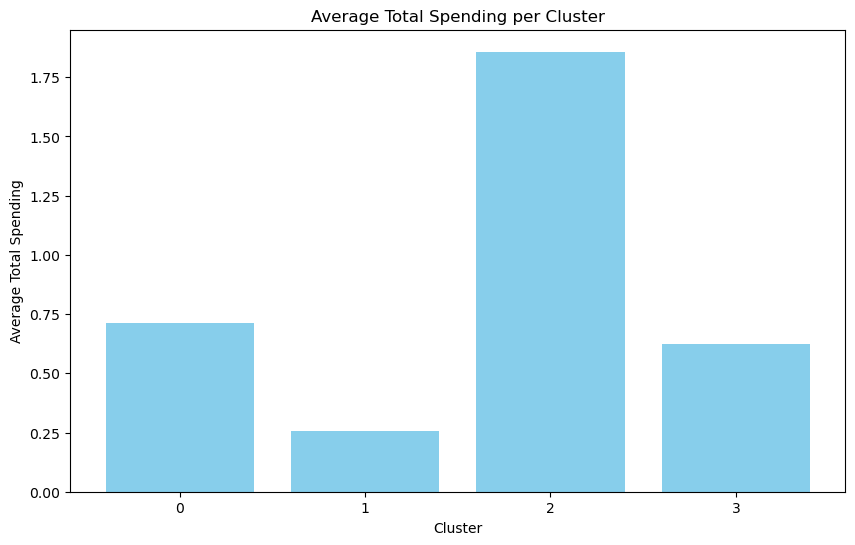

In [26]:
import matplotlib.pyplot as plt

# Calculate the total spending across categories for each row
clusters_df['Total_Spending'] = clusters_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Group by the 'Cluster' column and sum up the 'Total_Spending'
cluster_total_spending = clusters_df.groupby('Cluster')['Total_Spending'].mean()

# Initialize the plot with specified dimensions
plt.figure(figsize=(10, 6))

# Create the bar graph
plt.bar(cluster_total_spending.index, cluster_total_spending.values, color='skyblue')

# Label the axes
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')

# Add a title to the graph
plt.title('Average Total Spending per Cluster')

# Add tick labels for x-axis
plt.xticks(cluster_total_spending.index)

# Display the graph
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
# Clustering
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters (let's stick with 4)
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Fitting and assigning clusters
continuous_columns_scaled['Cluster'] = cluster.fit_predict(continuous_columns_scaled)

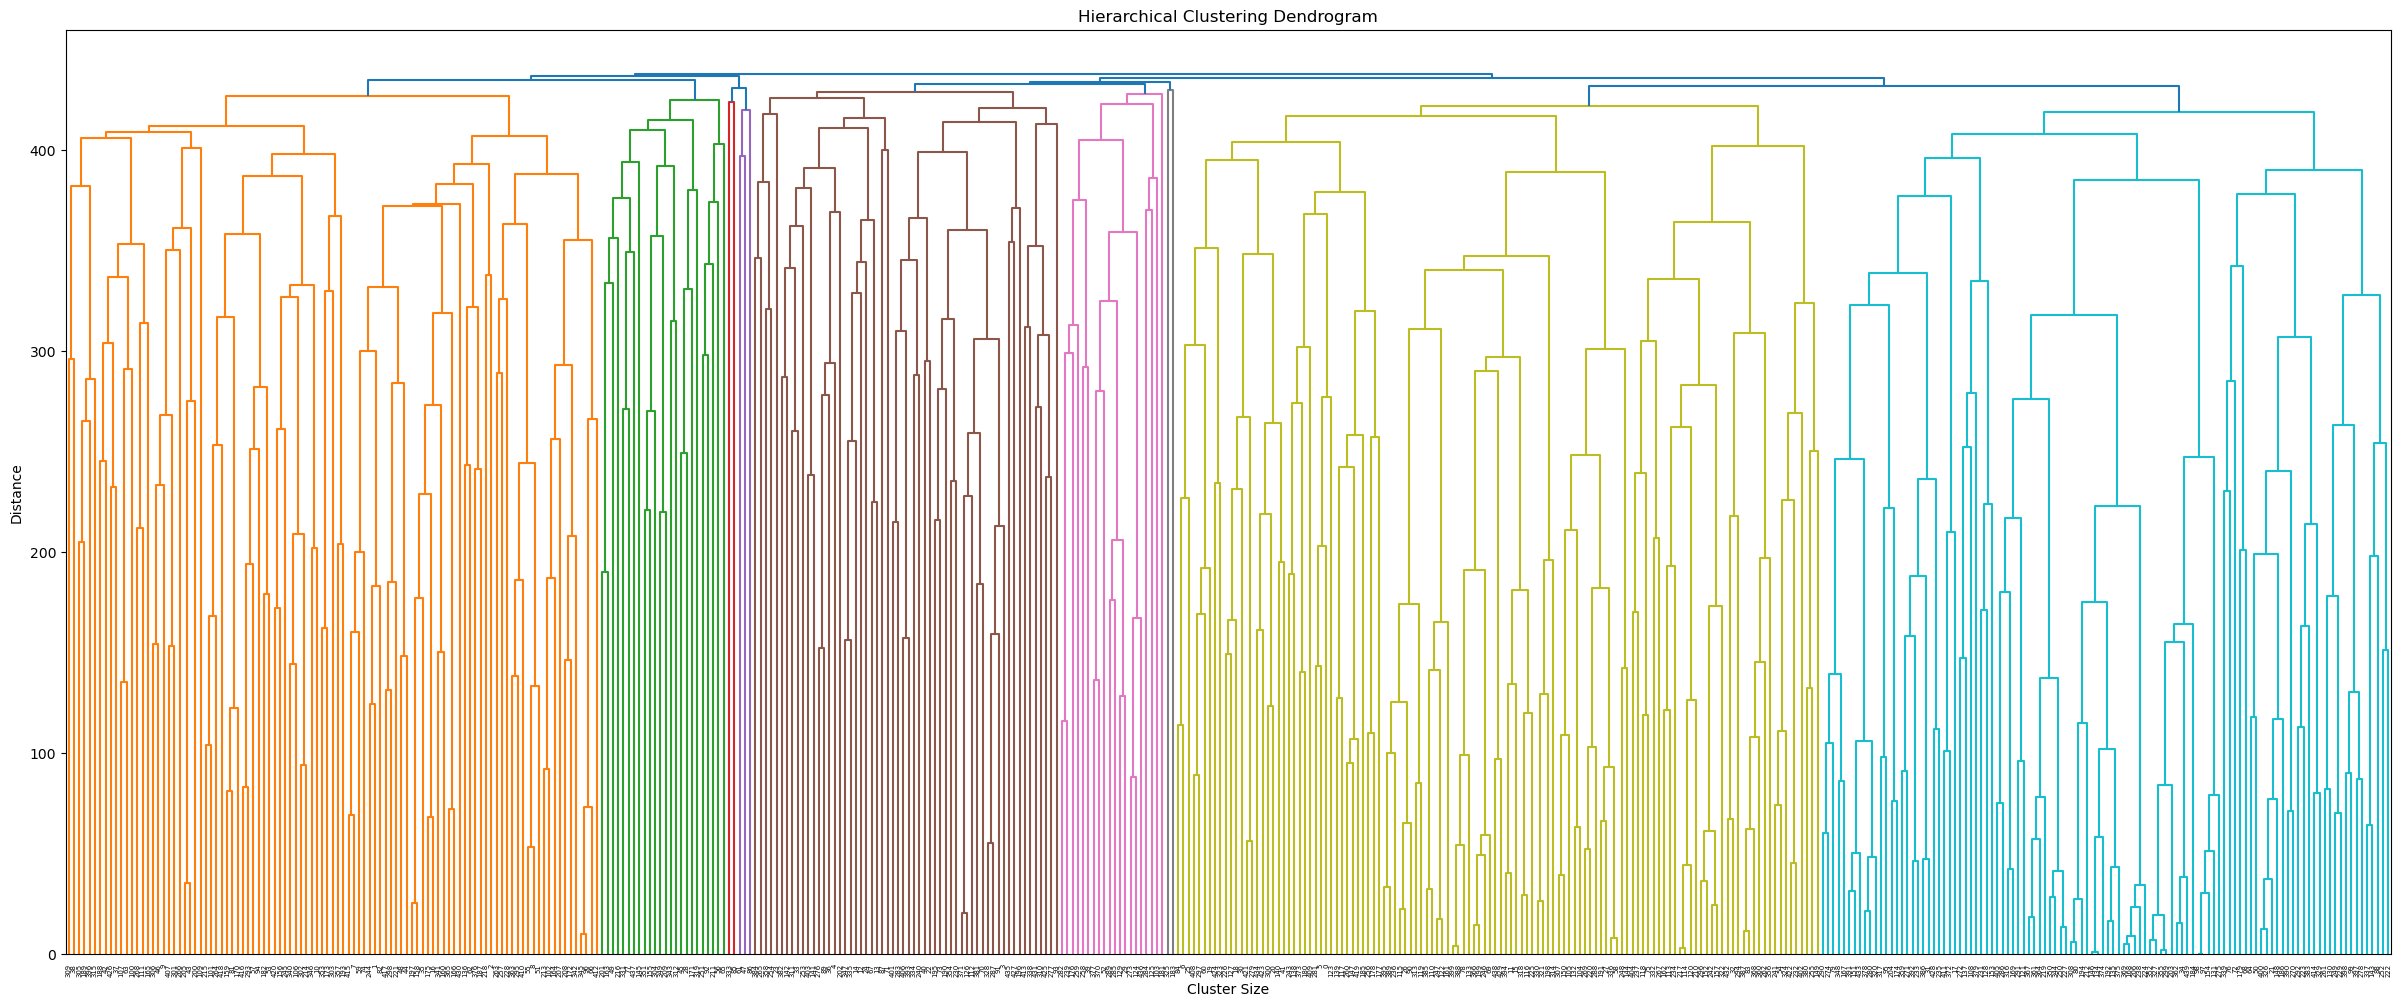

In [29]:
from scipy.cluster.hierarchy import dendrogram

# Get the linkage matrix from the clustering model
children = cluster.children_
distance = np.arange(children.shape[0])

# Create linkage matrix and plot the dendrogram
linkage_matrix = np.column_stack([children, distance, distance]).astype(float)

plt.figure(figsize=(30, 12))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=False, color_threshold=distance[-8])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

### Based off the above dendrogram it looks like four clusters would be a good cutoff.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Fitting the model:

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


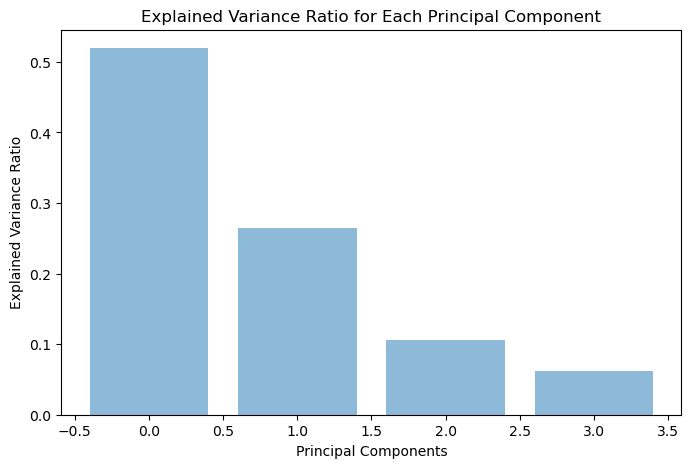

In [30]:
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA(n_components=4)

pca_cont_features = continuous_columns_scaled.copy()

pca_cont_features.drop(['Cluster'], axis=1, inplace=True)
print(pca_cont_features.columns)

# Apply the fit_transform method of model to your scaled_data
pca_features = model.fit_transform(pca_cont_features)

# Get the explained variance
explained_variance = model.explained_variance_ratio_

# Let's plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [31]:
type(pca_features)

numpy.ndarray

In [32]:
pca_features

array([[ 0.02044585, -0.00412432, -0.0163855 , -0.06310367],
       [ 0.04500329, -0.03688859,  0.02445439, -0.04076951],
       [ 0.04047414, -0.01374597,  0.07912717, -0.06286668],
       ...,
       [ 0.39394901, -0.01009283, -0.07857145,  0.03851376],
       [-0.10218494, -0.02453706, -0.006867  , -0.02618328],
       [-0.09947638, -0.09973339, -0.00363077, -0.01659254]])

In [33]:
pca_features_df = pd.DataFrame(pca_features)
pca_features_df

,0,1,2,3
0,0.020446,-0.004124,-0.016385,-0.063104
1,0.045003,-0.036889,0.024454,-0.040770
2,0.040474,-0.013746,0.079127,-0.062867
3,-0.092295,0.028786,0.027925,0.042360
4,-0.020514,0.106330,-0.004159,-0.022854
...,...,...,...,...
435,0.044462,0.228619,0.070570,0.032900
436,-0.121570,0.220951,-0.097728,0.001808
437,0.393949,-0.010093,-0.078571,0.038514
438,-0.102185,-0.024537,-0.006867,-0.026183


In [34]:
pca_features_df.drop(columns=[2, 3], inplace = True)

In [35]:
pca_features_df

,0,1
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330
...,...,...
435,0.044462,0.228619
436,-0.121570,0.220951
437,0.393949,-0.010093
438,-0.102185,-0.024537


In [36]:
#Dataframe with just the first two PCA components

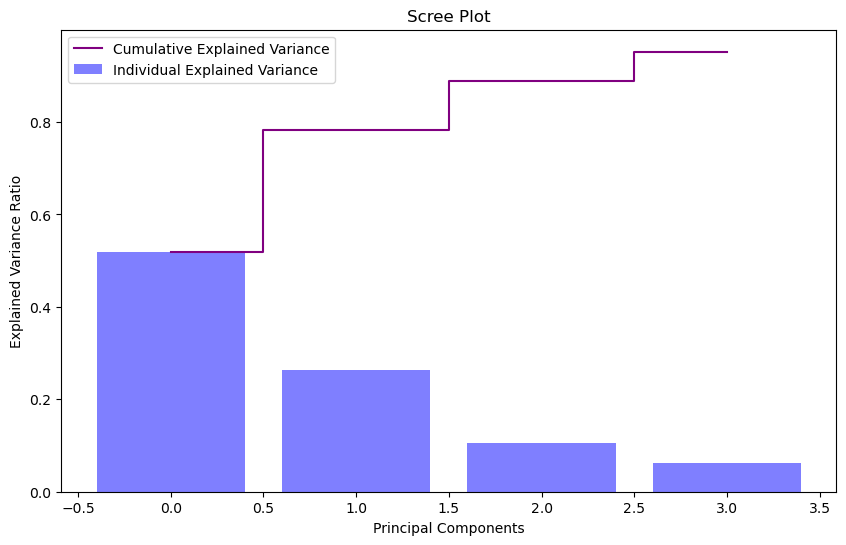

In [37]:
# Calculate the cumulative sum of the explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create the Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance', color='blue')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='purple')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

In [38]:
pca_features.shape

(440, 4)

### Looks like just the first two PCA components can explain about 80% of the variance:

In [39]:
#dataframe containing just the first two pca components we will be using
pca_features_df

,0,1
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330
...,...,...
435,0.044462,0.228619
436,-0.121570,0.220951
437,0.393949,-0.010093
438,-0.102185,-0.024537


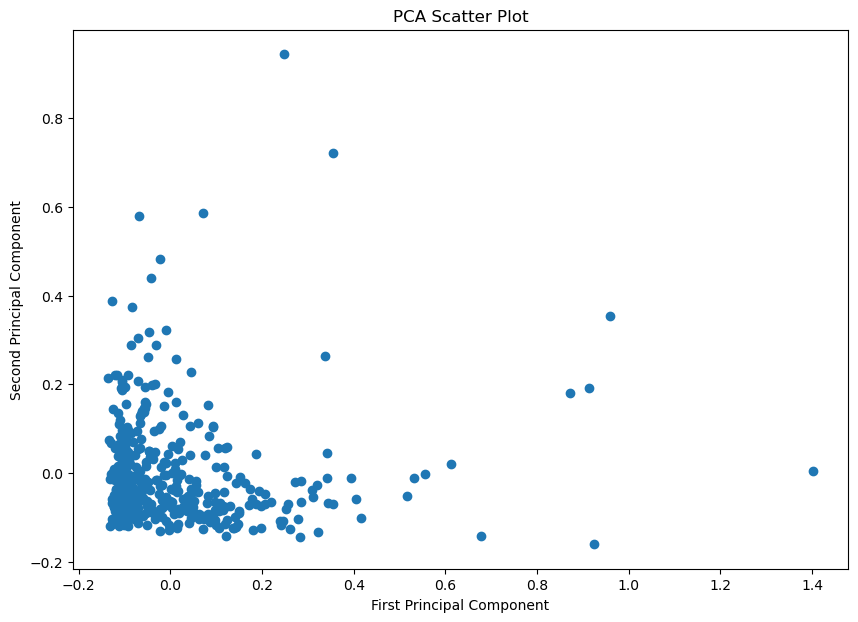

In [40]:
plt.figure(figsize=(10, 7))

# Scatter plot for the first and second principal components
plt.scatter(pca_features_df.iloc[:, 0], pca_features_df.iloc[:, 1])

# Labels and Titles
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')

plt.show()

In [41]:
print(pca_cont_features.columns)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


In [42]:
# Fetch the loadings
loadings = model.components_

    # Exclude the last column when showing loadings
loadings_df = pd.DataFrame(model.components_, columns=pca_cont_features.columns, index=[f'PC{i+1}' for i in range(model.n_components_)])


print("PCA Loadings")

print(loadings_df)

PCA Loadings
        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1 -0.018545  0.490473  0.576447 -0.017416          0.647882    0.082140
PC2  0.863877  0.181824 -0.003639  0.396910         -0.126527    0.217017
PC3 -0.501784  0.333715 -0.086809  0.658337         -0.220706    0.383657
PC4 -0.024034 -0.627960  0.197409  0.605219          0.350505   -0.277443


### PCA components are on a range of 1 to -1
- A value closer to positive 1 represents a strong positive infulence on the PCA component when that variable increases.
- A value closer to negative 1 represents a strong neagative infulence on the PCA component when that variable increases.

PC1: Highlights household essentials like "Grocery" and "Detergents_Paper" with positive values, while fresh items like "Fresh" and "Frozen" have negative influence.

PC2: Focuses on "Fresh" as a major contributor, accompanied by "Frozen" and "Delicassen," suggesting a connection between freshness and deli products.

PC3: Emphasizes "Frozen" and "Detergents_Paper," showing contrasts between cleaning supplies and frozen goods versus fresh produce.

PC4: Illustrates a balance between "Frozen" and "Delicassen," while revealing a nuanced link between categories like "Milk" and "Grocery."

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Classifying customers in to 4 clusters with k-means seems to have worked the best.
- This dataset comes from a wholesale chain in east africa, more specifcally Mauritus.
- There are customers who purchase similar ratios of items (eg. 50% grocery and 50% frozen) but spend more or less money (eg. 100 dollars vs 1000 dollars)
- The data we have is a little bit biased to region 3 ('other') since there are many more data points for that region than 1 or 2. However in our use case it didin't have a signifigant effect. Caution should be taken if using this dataset for future buisness applications other than this one.